In [1]:
import sys
sys.version

'2.7.14 (default, Sep 23 2017, 22:06:14) \n[GCC 7.2.0]'

In [6]:
%matplotlib inline
import random
import sys
import array
import collections
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from django.db.models import Q

import runner
import runner.models

from IPython.display import Markdown as md
name = DerbyEvent.objects.get(id=5).event_name
md("# Results for %s" % name)

ImportError: cannot import name cbook

## Rank winners - advance to district finals on Sat Feb 17
### Let us know ASAP if you cannot attend so we can notify the next runner up
- Tiger - Luca Silvio, "Wild Krats" 
- Wolf - Brendan Winnike, "Green Lightning"
- Bear - Jacob Caylor, "The Hulk"
- WEBELOS - Joshua Hiegert, "The Rail Zeppelin"
- AOL (formerly "WEBELOS II")- no enterants this year
### Golden Eagle Pinewood Derby info
http://www.goldeneaglekc.org/pinewood-derby 

- Note there is a $7 fee to cover their costs (includes a fee the school charges for janitorial services)
- The Wildcard (Austin Edmunds/SilverBullet) actually beat the the top Wolf finisher in the Finals.  The pack recognizes the 1st place finisher in the Primaries as the pack's representative in the Golden Eagle District Finals.  The Wildcard slot was added to try to balance the case where one rank fielded more than one stong contender compared to the other ranks.  We should consider this further, and make sure this case is spelled out to avoid any confusion in the future.  Drawing parallels to football, the Wildcard by definition does not win their division, but may advance to the Superbowl.  Thoughts?

## Race highlights

- Apologies - I didn't get information on who won the Best In Show voting.
- Joshua Hiegert's "The Rail Zeppelin" is based on German prototype, record-fast rail engine.  Read all about it [here](https://en.wikipedia.org/wiki/Schienenzeppelin).  I hope to see a working version of The Rail Zeppelin at next year's derby!!
- Some graphs and other data from the races are farther down
- The Rail Zeppelin and the CO2-powered 'Bad Idea' raise the question of "Open" vs. "Outlaw".  My suggestions for future races:
  - Set up for the derby in the morning
  - Host open **and** outlaw races for scouts, parents, and family to participate as a separate event that afternoon
  - This would be a separate event for those interested in participating.
  - Start at/around 3p so participants may attend 4p mass
  - Gives us a chance to shake out any last-minute issues before the main event
  - Shortens the main event, which we should try to keep well under 2 hours
  - Open Division would follow the rules
  
## Issues/improvements
There were a couple of glitches that slowed things down, both addressed for next year:
- The auto-refresh was broken, slowed things down.  This has been fixed, and will be tested before race day.
- I lost an hour during setup due to an easily-avoidable router issue.  This also invalidated the registration link.
- Car image size was slowing down browser rendering (not sure anyone else even noticed this).  Cause was due to a change in devices used to capture photos this year (phones vs. an old tablet).  This has been addressed for next year - phone images will be auto-optimized
- The registration form is now mobile-friendly (they had to zoom in/out a lot before this)
- will have several people helping with registration
- registrars will bring fully-charged phone or other device
- We were short on volunteers at registration.  Next year we'll push harder to fill these slots.
- Open Division - I think we missed some cars in this race.  If you didn't get to race, see Michelle Quintero for a refund.
- Need one or two vocal adults &/or boy scouts to MC & lend sportcaster-type color/commentary

# THANK YOU VOLUNTEERS!!!
0. The Rod & Paul Leinen for running yet another excellent pinewood derby workshop.
0. Troop 180 Boy Scouts who helped run the event: A.J. Caylor, Aidan Edmunds, Gavin Jones, Jacob Laake, Patrick Winnike
0. Shelly and Alan Hiegert, who helped register cars
0. Cory Winnike for picking up the pizzas
0. The Quinteros for running the concession stand
0. The Rod, Paul, Siobhan Leinen, & Matt Edmunds for track setup
0. Greg Williams for bringing the projector/setup & wifi router.

Here are some photos from the race and workshop.  I only took a few at the races, no time!
https://photos.app.goo.gl/9X3RBULjGHX7uWWg1 
- Be sure to check out the array of **amazing** Leinen cars.  This year's addition was the red kraken, built by Paul Leinen, made from two pinewood bodies and a space derby body!
- You will know a Bad Idea when you see it ;-)

In [375]:
race_key = {}
# print('Race id:name')
for race in Race.objects.all():
    race_key[race.name] = race.id
#     print(f'{race.id}:{race.name}')

chase_cars = []
# print("\nChase cars:")
for car in Racer.objects.filter(name__contains='Chase'):
    chase_cars.append(car.id)
#     print(car)

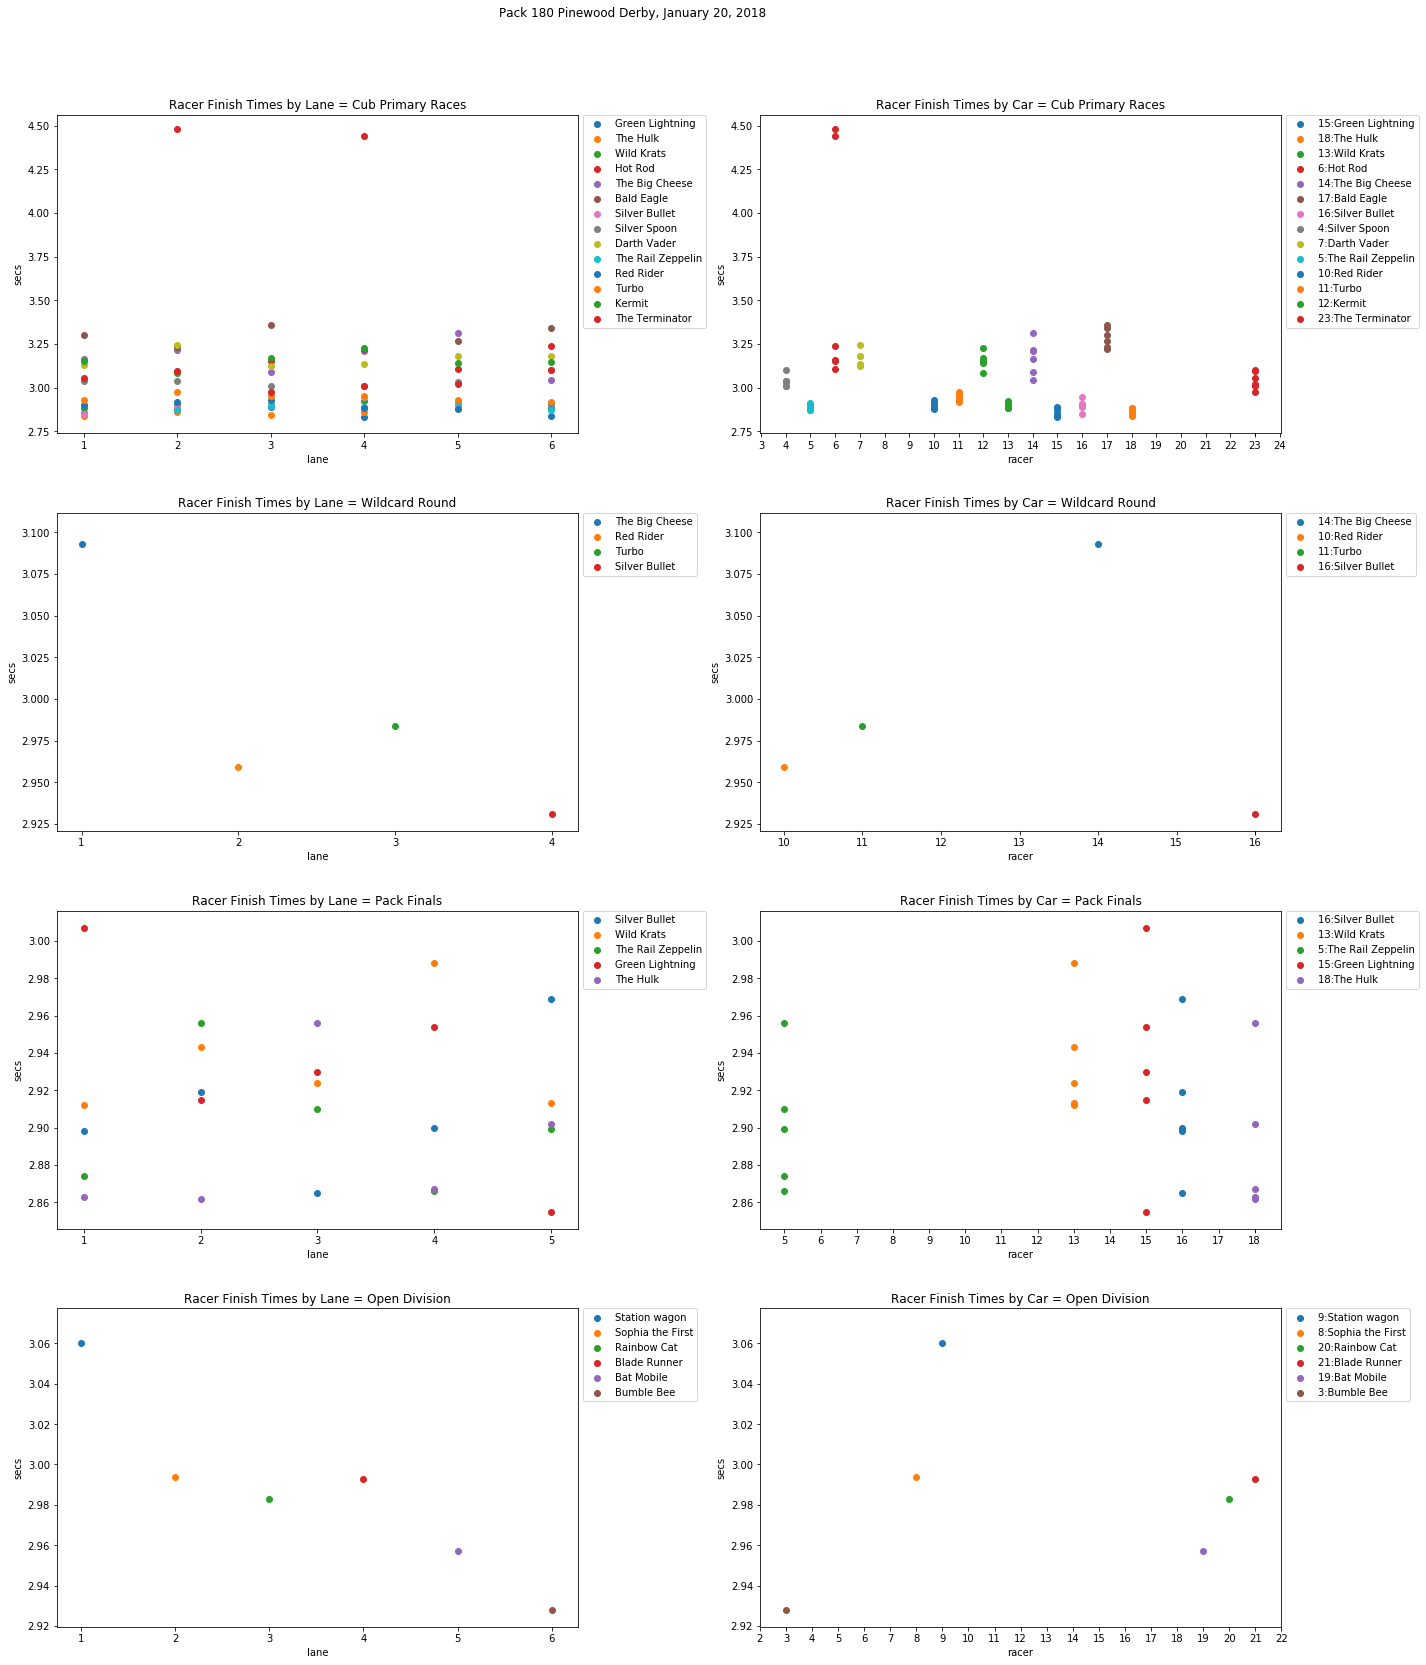

In [377]:
def get_lane_times(race_id):
    ''' Return dict of {racer_id: [lane, secs]}'''
    if race_id is None:
        print('race_ids must be an int')
        return None
    racer = collections.defaultdict(list)
    race = Race.objects.get(id=race_id)
    for run in race.run_set.all():
        for rp in run.runplace_set.all():
            racer[rp.racer_id].append([rp.lane, rp.seconds])
    return racer

def plot_by_lane(ax, results, title):
    for r, v in results.items():
        name = Racer.objects.get(id=r).name
        data = zip(*v)  # unzip, of sorts
        l = list(data)
        x = list(l[0])
        y = list(l[1])
        _ = ax.scatter(x, y, label=name)

    _ = ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    _ = ax.set_title(f'Racer Finish Times by Lane = {title}')
    _ = ax.set_xlabel('lane')
    _ = ax.set_ylabel('secs')
    _ = ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    
def plot_by_racer(ax, results, title):
    c = range(len(results.keys()))
    for r, v in results.items():
        x = []
        y = []
        name = Racer.objects.get(id=r).name
        for t in v:
            x.append(r)
            y.append(t[1])
        _ = ax.scatter(x, y, label=f'{r}:{name}')

    _ = ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    _ = ax.set_title(f'Racer Finish Times by Car = {title}')
    _ = ax.set_xlabel('racer')
    _ = ax.set_ylabel('secs')
    _ = ax.set_xticks(x, minor=True)
    _ = ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))

###################################################################
event = 'Cub Primary Races'
racer = get_lane_times(race_key[event])
# Add the races we ran with just Colt's car
r2 = get_lane_times(race_key["Colt's Races"])
# remove the 5 ghost cars from the results
for id in chase_cars:
    _ = r2.pop(id, None)
racer.update(r2)
plot_by_lane(ax[0,0], racer, event)
plot_by_racer(ax[0,1], racer, event)
###################################################################
event = 'Wildcard Round'
racer = get_lane_times(race_key[event])
plot_by_lane(ax[1,0], racer, event)
plot_by_racer(ax[1,1], racer, event)
###################################################################
event = 'Pack Finals'
racer = get_lane_times(race_key[event])
plot_by_lane(ax[2,0], racer, event)
plot_by_racer(ax[2,1], racer, event)
###################################################################
event = 'Open Division'
racer = get_lane_times(race_key[event])
plot_by_lane(ax[3,0], racer, event)
plot_by_racer(ax[3,1], racer, event)
###################################################################
_ = fig.suptitle(f'Pack 180 Pinewood Derby, January 20, 2018')
_ = plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)


Here are some additional notes and numbers:

- Colt's Races were Colt vs. 5 chase cars, to collect finish times for each lane.  The race program has a feature to shuffle in late arrivers for this exact scenario, but I forgot all about it.
- We were running behind due to a few technical glitches, so we shortened the wildcard and open division races.  I am always keenly aware that some folks get impatient with the race pacing when things aren't going smoothly, so tend to help hurry things along, for better or worse.  Looking back on the event, I'm not thrilled having done that, as racers lose out on additional races (and my pretty graphs have less data!), and a few extra races don't take a lot of time to run.  I hope that didn't cause any disappointment with the boys.
- Just like previous years, **the fastest cars are also the most consistent cars**.  This is especially clear in the graph at top-right, for the pack primary races by racer.  I'm sure if we ran more runs on the wildcard and open division, we would see the same thing.
- Car #6 (Hot Rod) had a pair of particularly bad runs.  These were the first two runs, so whatever the issue was, it must have fixed after that.
- Not captured in this data was Greg William's pack 180 land-speed record holder of 1.1 seconds.  What a cool car!

### Race: Cub Primary Races
```
Lanes in use: 6
Number of race participants: 13
Overall race stats:
        Fastest run time:  2.832 seconds
        Fastest run speed: 345 MPH
        Average run time:  3.051 seconds
        Average run speed: 322 MPH
        Slowest run time:  4.478 seconds
        Slowest run speed: 217 MPH
```
***
### Race: Colt's Races
_Late entrant races against 5 'ghost cars'_ <br>
```
Lanes in use: 6
Number of race participants: 6
Overall race stats:
        Fastest run time:  2.884 seconds
        Fastest run speed: 339 MPH
        Average run time:  3.146 seconds
        Average run speed: 313 MPH
        Slowest run time:  3.665 seconds
        Slowest run speed: 270 MPH
```
***
### Race: Wildcard Round
_One run_<br>
```
Lanes in use: 4
Number of race participants: 4
Overall race stats:
        Fastest run time:  2.931 seconds
        Fastest run speed: 335 MPH
        Average run time:  2.992 seconds
        Average run speed: 328 MPH
        Slowest run time:  3.093 seconds
        Slowest run speed: 318 MPH
```
***
### Race: Pack Finals
```
Lanes in use: 5
Number of race participants: 5
Overall race stats:
        Fastest run time:  2.855 seconds
        Fastest run speed: 343 MPH
        Average run time:  2.914 seconds
        Average run speed: 336 MPH
        Slowest run time:  3.007 seconds
        Slowest run speed: 327 MPH
```
***
### Race: Open Division
```Lanes in use: 6
Number of race participants: 6
Overall race stats:
        Fastest run time:  2.928 seconds
        Fastest run speed: 335 MPH
        Average run time:  2.986 seconds
        Average run speed: 329 MPH
        Slowest run time:  3.060 seconds
        Slowest run speed: 322 MPH
```

![Pack standings (Colt's result hacked in)](https://farm5.staticflickr.com/4675/39900448292_2316de225c_b.jpg)
![Pack finals](https://farm5.staticflickr.com/4715/39900448162_bfc94c0d44_b.jpg)
